In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

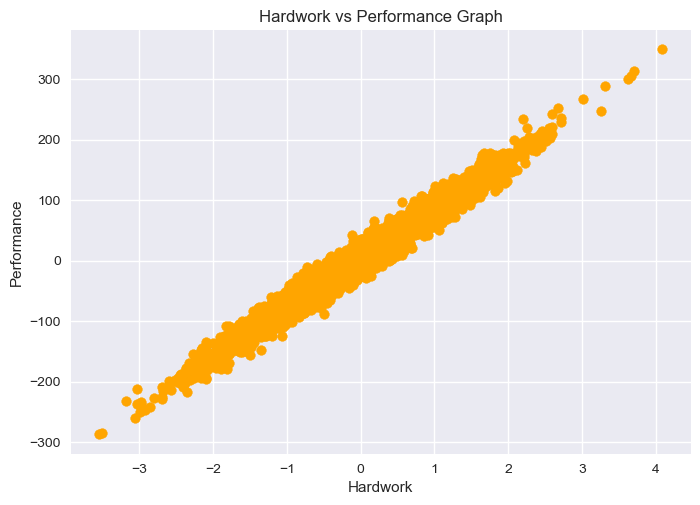

In [35]:
X = pd.read_csv('https://raw.githubusercontent.com/coding-blocks-archives/machine-learning-online-2018/master/3.%20Linear%20Regression/Linear%20Regression/Training%20Data/Linear_X_Train.csv')
y = pd.read_csv('https://raw.githubusercontent.com/coding-blocks-archives/machine-learning-online-2018/master/3.%20Linear%20Regression/Linear%20Regression/Training%20Data/Linear_Y_Train.csv')

# Convert X,Y to Numpy arrays
X = X.values
y = y.values

plt.style.use('seaborn')
plt.scatter(X, y, color='orange')
plt.title("Hardwork vs Performance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()


In [4]:


# X_test = pd.read_csv(
#     'https://raw.githubusercontent.com/coding-blocks-archives/machine-learning-online-2018/master/3.%20Linear%20Regression/Linear%20Regression/Test%20Cases/Linear_X_Test.csv').values

# output = model.predict(X_test)
# output


array([[-147.52847525],
       [ -66.26699842],
       [-200.06209345],
       ...,
       [  14.0382031 ],
       [ -18.66616899],
       [ -51.07594693]])

In [16]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

In [18]:
def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        
        grad[0] += (y_ - y)
        grad[0] += (y_ - y)*x
    return grad/m        

In [26]:
def error(X, Y, theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2

    return (total_error/m)


In [39]:
def gradientDescent(X,Y,max_steps = 100,learning_rate = 0.1):
    
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    for i in range(max_steps):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)[0]
        
        #update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[0] = theta[1] - learning_rate*grad[1]
        #store the theta values 
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)
        
    return theta,error_list,theta_list


In [40]:
theta,error_list,theta_list = gradientDescent(X,y)

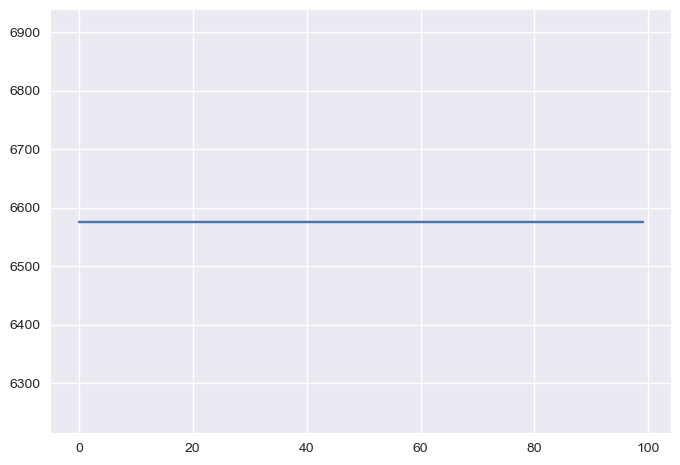

In [41]:
plt.plot(error_list)
plt.show()

In [30]:
def r2_score(Y,Y_):
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y-Y.mean())**2)
    score = (1-num/denom)
    return score*100

In [31]:
# Load the test data
X_test = pd.read_csv('https://raw.githubusercontent.com/coding-blocks-archives/machine-learning-online-2018/master/3.%20Linear%20Regression/Linear%20Regression/Test%20Cases/Linear_X_Test.csv').values
y_test = hypothesis(X_test,theta)

In [38]:
y_ = hypothesis(X,theta)
r2_score(y,y_) 

-0.007112000165054866

Linear regression using sklearn

In [42]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)
bias = model.intercept_
coeff = model.coef_

In [43]:
model.score(X,y)

0.9709612233822353